In [123]:
df

,sentiment,comment,comment_length
0,not nostalgia,He was a singer with a golden voice that I lov...,290
1,nostalgia,The mist beautiful voice ever I listened to hi...,129
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,369
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,332
4,nostalgia,listening to his songs reminds me of my mum wh...,67
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",171
1496,not nostalgia,it's sad this is such a beautiful song when yo...,110
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",109
1498,nostalgia,I was born in 1954 and started to be aware of ...,330


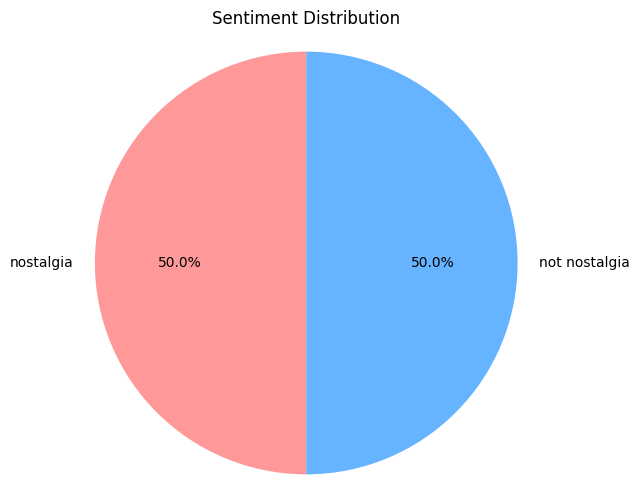

In [124]:
import matplotlib.pyplot as plt
sentiments = ['nostalgia', 'not nostalgia']
counts = df.sentiment.value_counts()  # 假設 'nostalgia' 有 150 條評論, 'not nostalgia' 有 250 條評論
plt.figure(figsize=(6,6))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# 圓餅圖標題
plt.title('Sentiment Distribution')

# 確保圓餅圖是圓形的
plt.axis('equal')  

# 顯示圖表
plt.show()

In [122]:
nostalgia_comments = df[df['sentiment'] == 'nostalgia']['comment']

# 將所有懷舊評論合併成一個大文本
nostalgia_text = ' '.join(nostalgia_comments)

# 打印合併後的文本
# print(nostalgia_text)

In [52]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


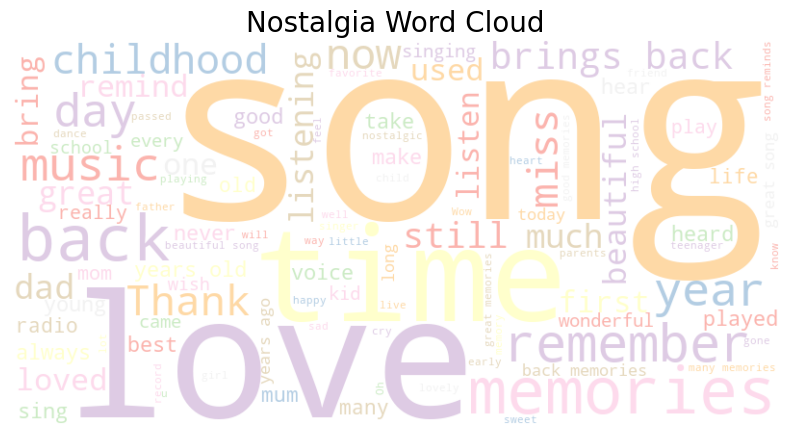

In [58]:
from wordcloud import WordCloud
# create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='Pastel1').generate(nostalgia_text)

# 繪製詞雲圖
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nostalgia Word Cloud', fontsize=20)
plt.show()

In [121]:
not_nostalgia_comments = df[df['sentiment'] == 'not nostalgia']['comment']

# 將所有懷舊評論合併成一個大文本
not_nostalgia_text = ' '.join(not_nostalgia_comments)

# 打印合併後的文本
# print(not_nostalgia_text)

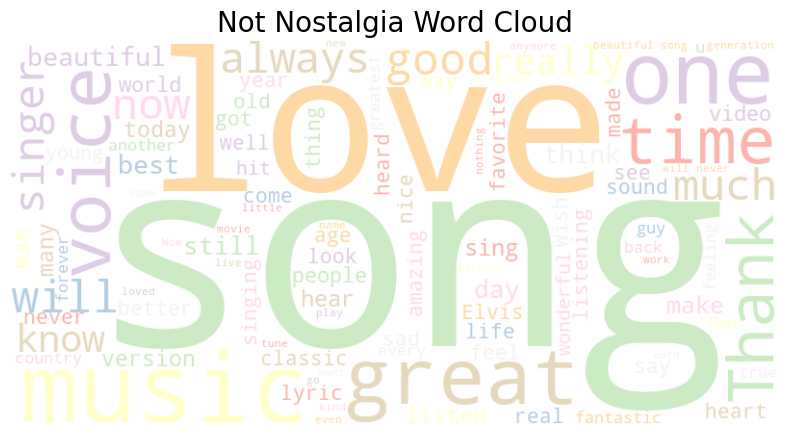

In [57]:
# create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='Pastel1').generate(not_nostalgia_text)

# 繪製詞雲圖
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.title('Not Nostalgia Word Cloud', fontsize=20)
plt.show()

In [59]:
# 計算每條評論的字數（字元長度）
df['comment_length'] = df['comment'].apply(len)
print(df)

          sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      comment_length  
0                290  
1                129  
2                369  
3                33

C:\Users\alany\AppData\Local\Temp\ipykernel_31492\2531579779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='comment_length', data=df, palette='Set2')


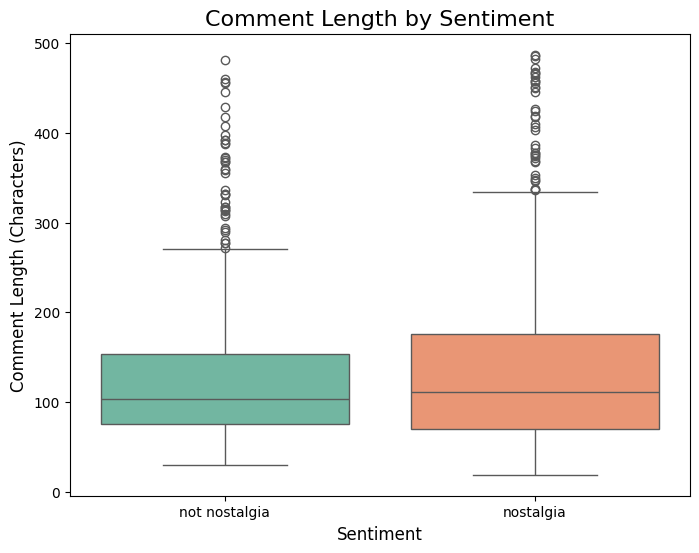

In [60]:
import seaborn as sns

# 繪製箱型圖來展示不同情感的評論長度分佈
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='comment_length', data=df, palette='Set2')

# 圖表標題和標籤
plt.title('Comment Length by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Comment Length (Characters)', fontsize=12)

# 顯示圖表
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
df['comment']

0       He was a singer with a golden voice that I lov...
1       The mist beautiful voice ever I listened to hi...
2       I have most of Mr. Reeves songs.  Always love ...
3       30 day leave from 1st tour in Viet Nam to conv...
4       listening to his songs reminds me of my mum wh...
                              ...                        
1495    i don't know!..but the opening of the video,.....
1496    it's sad this is such a beautiful song when yo...
1497    Dear Friend, I think age and time is not that ...
1498    I was born in 1954 and started to be aware of ...
1499    This is the first CD I bought after my marriag...
Name: comment, Length: 1500, dtype: object

In [16]:
df['comment'].dtype

dtype('O')

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comment'])
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [18]:
print(X.shape)

(1500, 3730)


In [19]:
# Generate TF-IDF features
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31260 stored elements and shape (1500, 3730)>
  Coords	Values
  (0, 1598)	0.10513385901190023
  (0, 3570)	0.13957868665289525
  (0, 2973)	0.133379582278289
  (0, 3650)	0.09118405957610763
  (0, 1470)	0.17742037513225833
  (0, 3534)	0.10537072896744779
  (0, 3282)	0.08100665209874867
  (0, 2028)	0.0842729676163571
  (0, 3336)	0.05657407634385312
  (0, 1606)	0.11892494345450205
  (0, 233)	0.19792327047870298
  (0, 3284)	0.1516729120243016
  (0, 3328)	0.18799137008070552
  (0, 1651)	0.22762334468523981
  (0, 1512)	0.09516329916083405
  (0, 1249)	0.198518136483349
  (0, 323)	0.10633708427990492
  (0, 214)	0.14662963513401264
  (0, 2341)	0.06161098737789328
  (0, 15)	0.23195729707399185
  (0, 1733)	0.06690176208155543
  (0, 3304)	0.12462322016675045
  (0, 907)	0.1131904745433698
  (0, 258)	0.11460109209478042
  (0, 3124)	0.11082519678973467
  :	:
  (1499, 2254)	0.11865538701390131
  (1499, 1798)	0.07681760654574174
  (1499, 3704)

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

In [110]:
X1 = df['comment']
X2 = df['sentiment']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X1, X2, test_size=0.25, random_state=42)

In [113]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

In [114]:
mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)
y_pred_bow = mnb.predict(X_test_bow)

In [115]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f'Word frequency feature: {accuracy_bow:.2f}')

Word frequency feature: 0.84


In [116]:
# 生成 TF-IDF 特徵矩陣
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [117]:
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [118]:
gnb = GaussianNB()
gnb.fit(X_train_tfidf_dense, y_train)
y_pred_tfidf = gnb.predict(X_test_tfidf_dense)

In [119]:
# 評估模型表現
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'TF-IDF accuracy: {accuracy_tfidf:.2f}')

TF-IDF accuracy: 0.67


In [120]:
print(f"Word frequency feature accuracy: {accuracy_bow:.2f}")
print(f"TF-IDF accuracy: {accuracy_tfidf:.2f}")

Word frequency feature accuracy: 0.84
TF-IDF accuracy: 0.67


In [ ]:
# In TF-IDF, we are using Gaussian Naive Bayes, which assumes that the feature values follow a normal distribution and are continuous variables. However, TF-IDF features do not always follow this kind of distribution, which may cause the model to perform less effectively compared to word frequency feature.